## Analysis of Mfeat data set


### Descriptive analysis


#### importing libraries


In [1]:
#Loading data
import pandas as pd 
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



#### importing training data

In [2]:
data = pd.read_csv("data_train.csv") 

#### Descriptice analysis

In [3]:
description=data.describe()
description.to_csv("description.csv")

In [266]:
data2=data.groupby('class').mean() 
data2.to_csv("description2.csv")

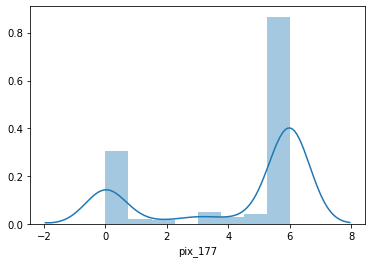

In [1358]:
sns.distplot(data['pix_177'])

#### shapiro normality test

In [ ]:

from scipy.stats import shapiro
for fea in data.columns:
    print(str(fea)+","+str(shapiro(data[fea])[1]))

#### Plotting variables

In [1847]:
#defining function for plotting boxplots of variables
def draw_boxplot(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(50, 50), dpi= 60, facecolor='w', edgecolor='k')
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df.boxplot(var_name,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    fig.savefig("abc.png")

In [1849]:
#defining function for plotting histograms of variables

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    fig.savefig("abc.png")


In [4]:
variables=['fac_6','fac_27','fac_30','fac_54','fac_114','fac_186','fac_210','pix_1','pix_15','pix_22','pix_23','pix_24','pix_91','pix_105','pix_106','pix_121','pix_136','pix_211','pix_226','pix_240','zer_1','zer_2','zer_8','zer_14','zer_20','zer_30','zer_32','zer_39','zer_44']


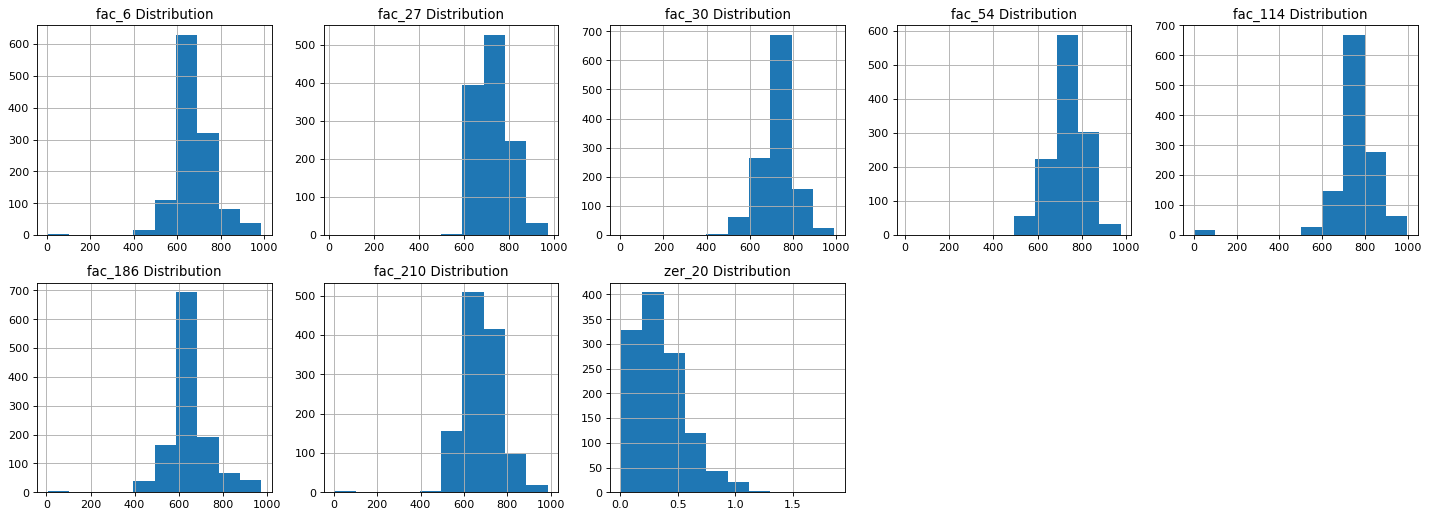

In [1852]:
draw_histograms(data,variables,5,5)

In [292]:
skew=data.skew()
skew.to_csv("skew.csv")

E:\CVM\GTU\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [295]:
median=data.median()
median=median.to_csv("median.csv")

E:\CVM\GTU\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [296]:
mode=data.mode()
mode=mode.to_csv("mode.csv")

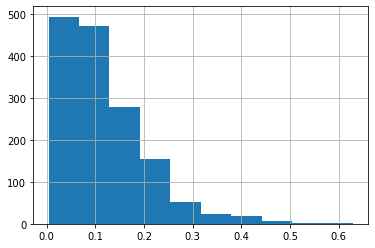

In [1173]:
data['zer_8'].hist()

### Cleaning Data


#### Data cleanning (outliers)

In [5]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3)
    upper_bound = quartile_3 + (iqr * 3)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [6]:
variables=['fac_6','fac_27','fac_30','fac_54','fac_114','fac_186','fac_210','zer_20']
index=[]
for var in variables:
    outliers=outliers_iqr(data[var])[0]
    index=np.concatenate((outliers, index), axis=0)
outliers=np.unique(index)
outlier_indexes=outliers.astype(int)
data.drop(outlier_indexes,inplace=True)

#### Correlation Matrix 

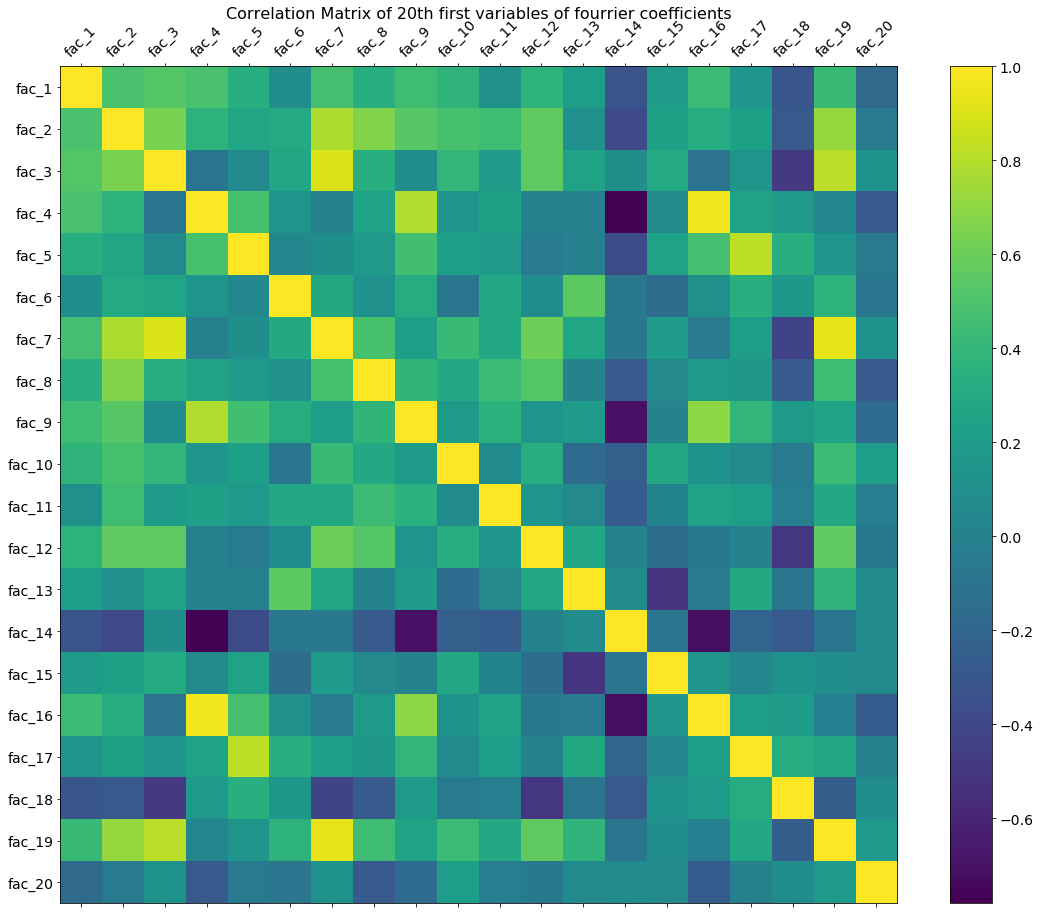

In [628]:
df=data.iloc[:,range(0,20)]
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of 20th first variables of fourrier coefficients', fontsize=16);
f.savefig("correlation.png")

#### Dropping high correlated features

In [7]:
df=data
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [8]:
data.drop(data[to_drop], axis=1,inplace=True)

#### Dropping variables with low variance

In [9]:
variables2=['pix_1','pix_15','pix_22','pix_23','pix_24','pix_91','pix_105','pix_106','pix_121','pix_136','pix_211','pix_226','pix_240','zer_1','zer_2','zer_8','zer_32']

In [10]:
data.drop(data[variables2], axis=1,inplace=True)

### Exploratory analysis


#### AFM analysis


In [16]:
import prince

In [17]:
X = data.drop(['class'],axis=1)
columns=data.columns.get_values()
index=['classe {}'.format(i+1) for i in range(10)]

E:\CVM\GTU\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


In [18]:
#Construct groups of variables
group1=data.columns.get_values()[0:153]
group2=data.columns.get_values()[153:229]
group3=data.columns.get_values()[229:293]
group4=data.columns.get_values()[293:298]
group5=data.columns.get_values()[298:525]
group6=data.columns.get_values()[525:551]

E:\CVM\GTU\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  
E:\CVM\GTU\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\CVM\GTU\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  after removing the cwd from sys.path.
E:\CVM\GTU\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """
E

In [19]:
groupes={'groupe1':group1,'groupe2':group2,'groupe3':group3,'groupe4':group4,'groupe5':group5,'groupe6':group6}

In [20]:
mfa = prince.MFA(
groups=groupes,
n_components=552,
n_iter=3,
copy=True,
check_input=True,
engine='auto',
random_state=42
)

In [21]:
mfa = mfa.fit(X)

In [22]:
mfa.row_coordinates(X)

0         1         2         3         4         5         6    \
0     3.586230 -2.148888  0.058858 -0.156174  0.019948  0.550095  1.241363   
1     3.351882 -1.972610 -0.510141 -0.518834 -0.095881 -0.890958  1.401210   
2     2.769339 -0.923711 -0.556986  0.557096  1.600492  0.892374  2.024398   
3     2.923882 -1.357988  1.010672  0.732647 -1.182839 -0.786635  0.976628   
4     3.084450 -2.000958 -0.706424 -0.293951  0.765419 -0.505314  1.841370   
...        ...       ...       ...       ...       ...       ...       ...   
1495 -0.998496 -0.201105 -1.625644  0.543908 -0.375769 -1.290984 -1.854041   
1496 -0.816900 -1.026531 -1.730549  0.800533 -0.616348 -1.434995 -0.097577   
1497 -0.994816  1.699053 -1.355912 -0.075675  2.116691  2.126245 -1.295645   
1498 -0.803576 -0.838592 -1.879528  2.000384  0.419841 -1.460013 -1.421362   
1499  1.040357  0.067146 -2.150715  1.787893 -0.245394 -0.935088 -0.474119   

           7         8         9    ...       541       542       543  \
0    -0.025500 -0.759428  0.092222  ...  0.005527 -0.003577 -0.003159   
1     0.687267 -0.058989 -0.211366  ...  0.008154  0.001074 -0.006356   
2    -0.566913 -0.943459 -2.492594  ...  0.006777 -0.009234  0.002387   
3     2.284944 -0.544354  0.645414  ...  0.003017 -0.000613 -0.000845   
4    -0.294092 -0.658960  0.124180  ... -0.000771  0.002269  0.008834   
...        ...       ...       ...  ...       ...       ...       ...   
1495  0.875811 -0.155084  0.447490  ...  0.002806  0.010712  0.005276   
1496  0.028516  0.072298 -0.226435  ...  0.003489 -0.014714  0.009529   
1497 -0.990727 -1.684412  0.486327  ... -0.004448 -0.011109  0.004825   
1498 -0.290801 -0.089692 -0.366525  ... -0.008254  0.003061  0.000893   
1499 -0.697323  1.302906 -0.009137  ... -0.008391 -0.013112  0.006638   

           544       545       546       547       548       549       550  
0     0.000030 -0.002012 -0.002013 -0.004500  0.000708  0.000763 -0.001800  
1     0.004627 -0.006543 -0.000924  0.003497  0.003521 -0.003006  0.000753  
2     0.000840 -0.010317 -0.009755  0.005291  0.006725  0.001375 -0.008823  
3     0.004966  0.001592  0.005721 -0.002141 -0.001031 -0.004639  0.000940  
4     0.006073  0.005588 -0.000962  0.004428 -0.000466  0.009757 -0.006097  
...        ...       ...       ...       ...       ...       ...       ...  
1495 -0.003777 -0.001844 -0.005652 -0.003102 -0.002454 -0.003533 -0.005405  
1496 -0.003218  0.001228  0.002615 -0.006558  0.003921  0.002379  0.007345  
1497 -0.008868 -0.011076  0.002097  0.004423 -0.005683 -0.004949 -0.002322  
1498  0.001631 -0.000396  0.000797 -0.003896  0.004266 -0.004146  0.003715  
1499  0.002684  0.013911 -0.009019 -0.002662 -0.004711  0.001493  0.002471  

[1475 rows x 551 columns]

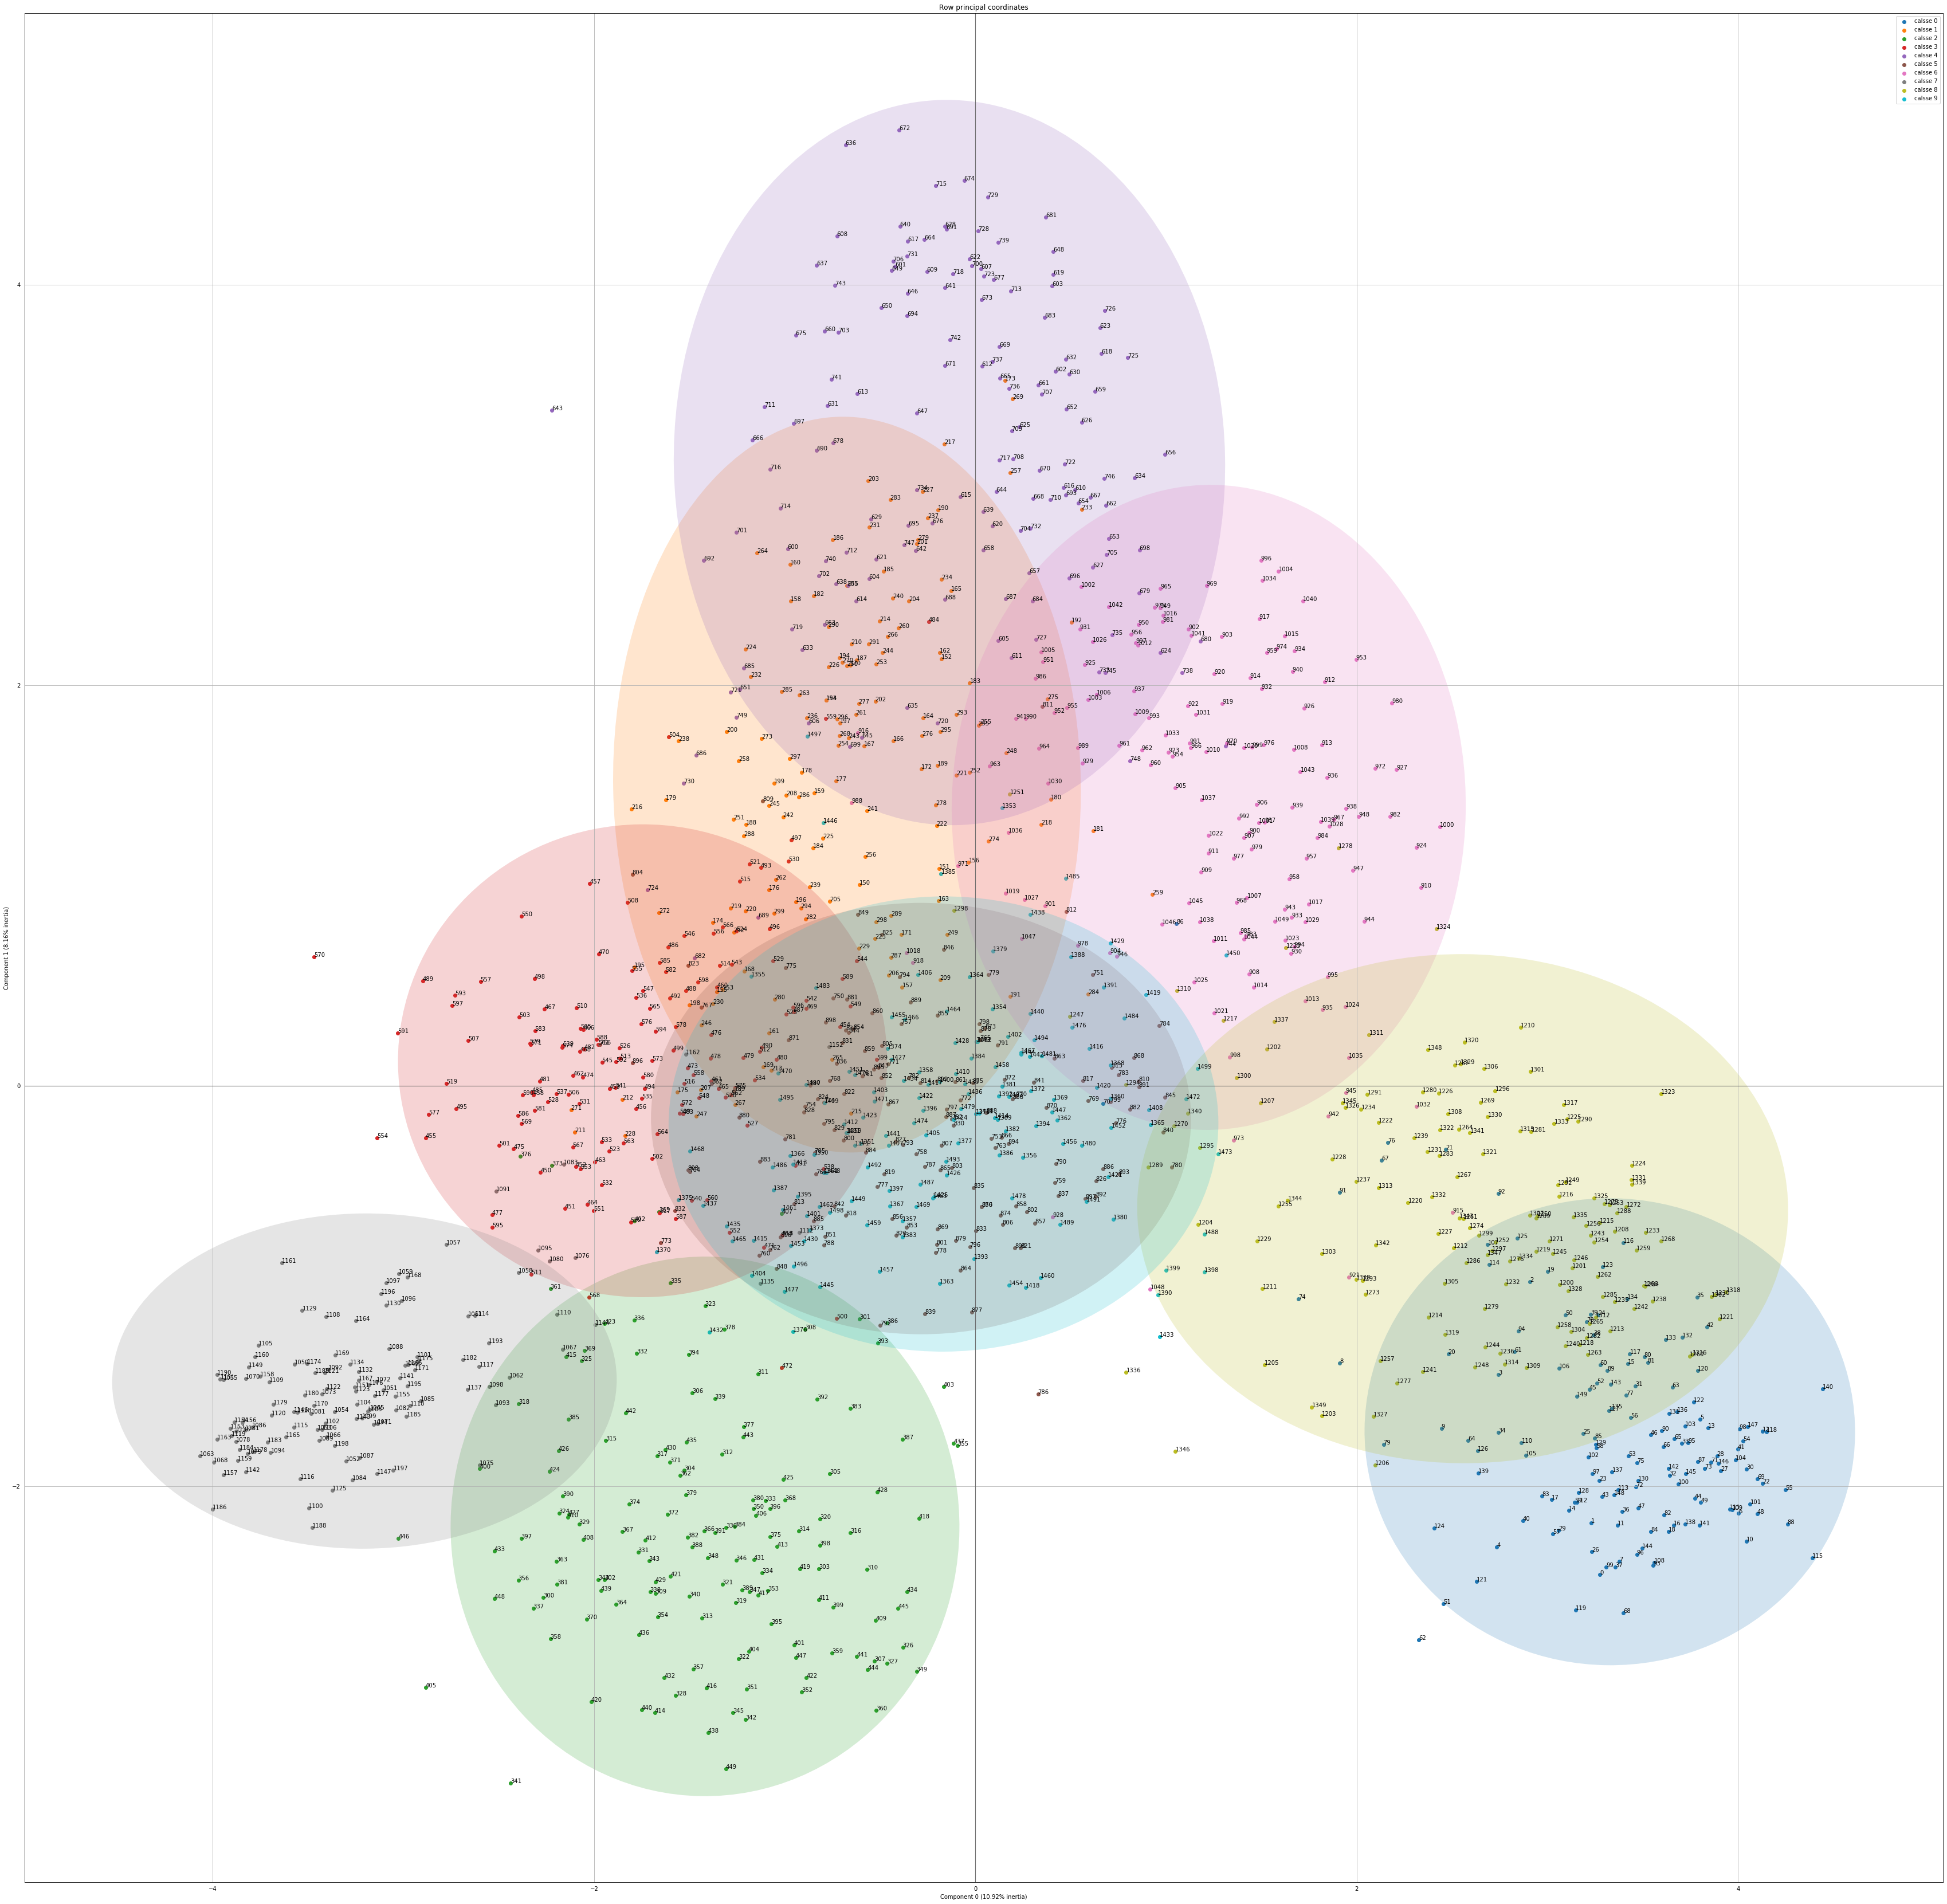

In [1441]:
#Plotting individuals in factor plan
ax = mfa.plot_row_coordinates(
X,
ax=None,
figsize=(60, 60),
x_component=0,
y_component=1,
labels=X.index,
color_labels=['calsse {}'.format(t) for t in data['class']],
ellipse_outline=False,
ellipse_fill=True,
show_points=True
)


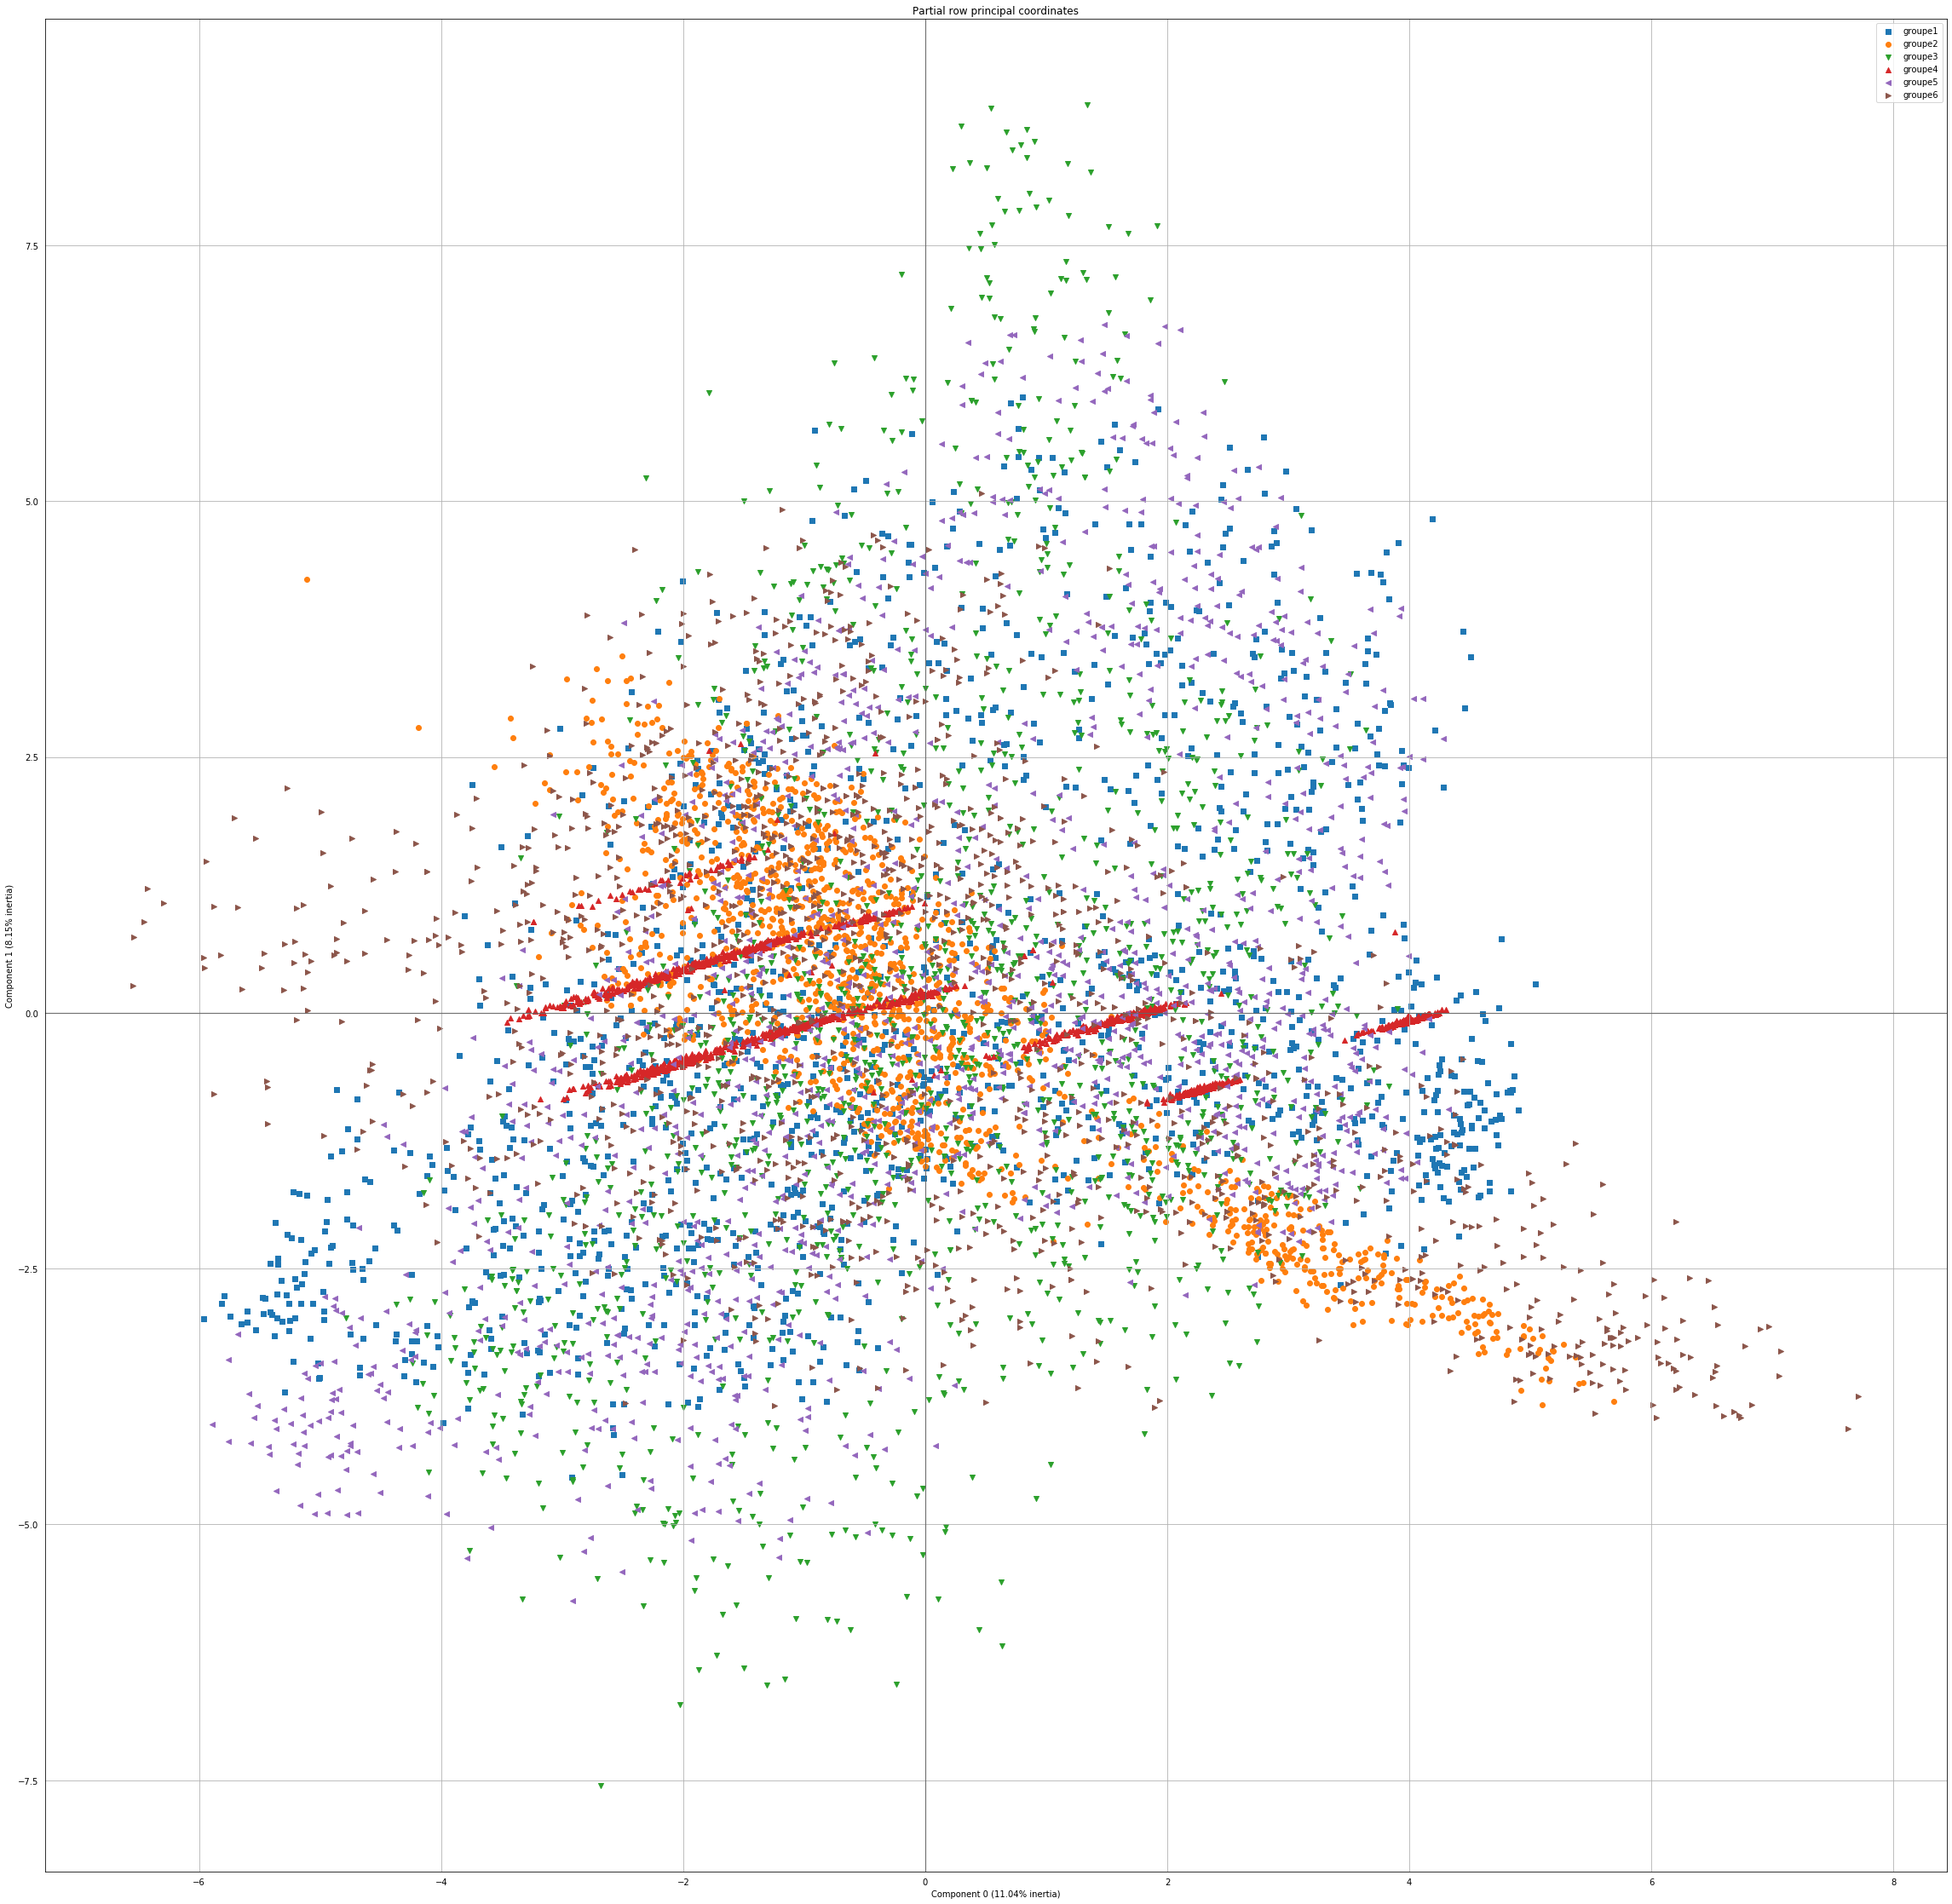

In [1716]:
#plotting groups of variables in factor plan
ax = mfa.plot_partial_row_coordinates(
X,
ax=None,
figsize=(40, 40),
x_component=0,
y_component=1,
)
ax.get_figure().savefig('mfa_partial_row_coordinates.svg')

In [24]:
mfa.explained_inertia_[1:5]

[0.08217937708154475,
 0.05961432873508772,
 0.05164220121032245,
 0.04380062719065025]

In [25]:
 mfa.eigenvalues_[1:5]

[2.91070069225868, 2.1114721731898367, 1.8291084229501207, 1.5513687303650898]

In [815]:
for name, fa in sorted(mfa.partial_factor_analysis_.items()):  # doctest: +ELLIPSIS
    print('{} eigenvalues: {}'.format(name, fa.eigenvalues_))

groupe1 eigenvalues: [31.652894448704345, 22.186686645308537, 17.370605332140986, 11.824414087733315, 9.322442930738104]
groupe2 eigenvalues: [11.826189853131451, 5.201117259313143, 4.826680457949398, 2.7460448926675713, 2.5228997397450064]
groupe3 eigenvalues: [5.634611681148499, 5.191973620618263, 3.60443355550322, 3.296018299990814, 2.6702615969627854]
groupe4 eigenvalues: [3.249032035312228, 1.0867312262405882, 0.6024743026216429, 0.05763218400536026, 0.004130251820181291]
groupe5 eigenvalues: [38.27200100014378, 23.38902551814938, 21.518856530621235, 15.165299776777033, 13.106170412401877]
groupe6 eigenvalues: [6.946679426942888, 5.035272546562144, 3.128178821658927, 2.4879890692192514, 2.006571668634843]


#### K-means analysis


In [1918]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline 
    from sklearn.cluster import KMeans
    from sklearn import datasets
    #we took one group or all variables
    #df=data.loc[:,group7]
    df=data.drop(['class'],axis=1)


In [1919]:
    #Looking for the optimal K
    distortions = []
    K = range(1,20)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(df)
        distortions.append(kmeanModel.inertia_)

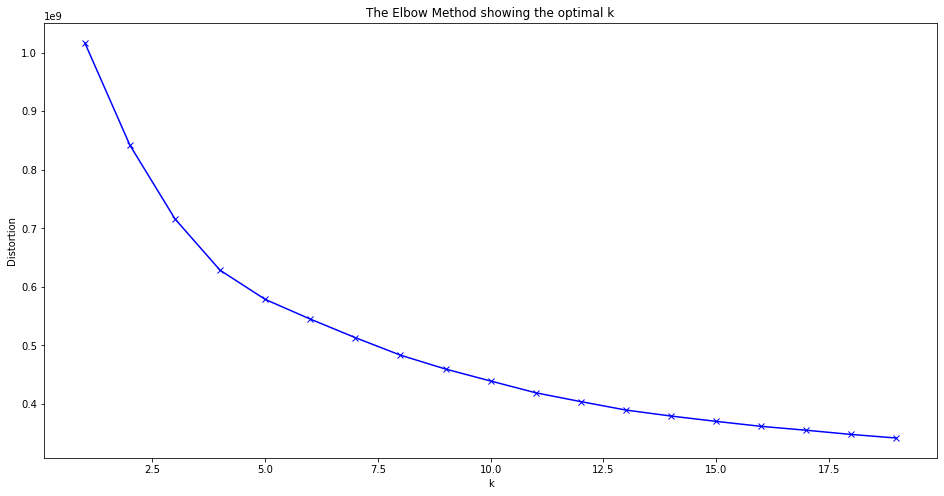

In [1921]:
    #Looking for the optimal K
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [1922]:
#train the model with 5 or 10 classes
#kmeanModel = KMeans(n_clusters=5)
kmeanModel = KMeans(n_clusters=10)
kmeanModel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'K_Means')

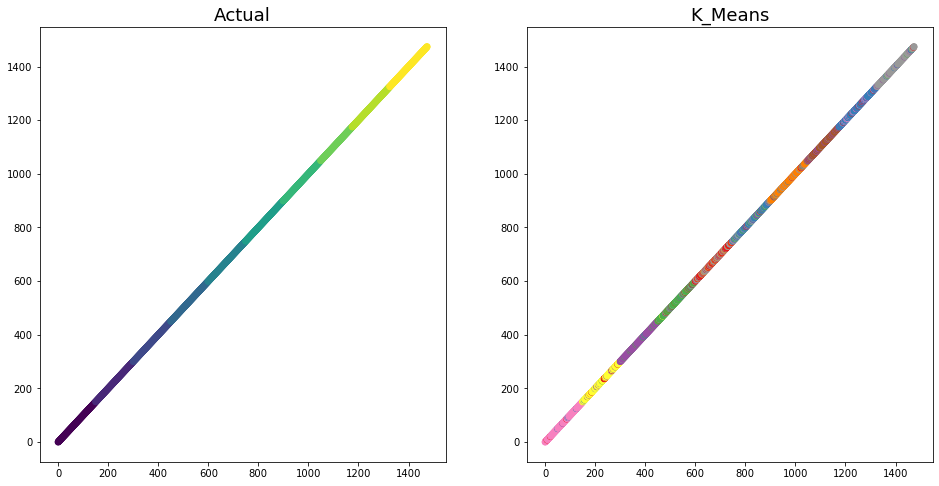

In [1923]:
    #plot classification of kmean versus real data
    df['k_means']=kmeanModel.predict(df)
    df['target']=data['class']
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(range(len(df)),range(len(df)), c=df['target'])
    axes[1].scatter(range(len(df)), range(len(df)), c=df['k_means'], cmap=plt.cm.Set1)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('K_Means', fontsize=18)
  

### Statistics modelling 

#### Splitting  train set and test set

In [41]:
origin = pd.read_csv("data_train.csv") 
data, X_test, data_class, y_test = train_test_split(origin.drop(['class'],axis=1), origin['class'], test_size=0.2, random_state=0)

#### reset indexes of data

In [42]:
data['class']=data_class
data=data.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

#### Sclaing and transforming data

In [43]:
#transform train data and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

droped_variables=variables2+to_drop
df=data.drop(['class'],axis=1)
df=df.drop(droped_variables,axis=1)
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
X_test=X_test.drop(droped_variables,axis=1)
scaler.fit(X_test)
X_test=scaler.transform(X_test)


#### RandoForest Modeling

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

score=[]
for i in [5,10,20,30,40,50,100]:
    regressor = RandomForestRegressor(n_estimators=i, random_state=0)
    model_cv = cross_val_score(regressor,df,data['class'],cv=5)
    score.append(model_cv.mean())


In [39]:
score


[0.9168457926593845,
 0.9326428188744407,
 0.9380714889197537,
 0.9424267885819155,
 0.9428729996344428,
 0.9453370527158146,
 0.9462856611797023]

In [1951]:
#Implement random forest regressor with best parameter
regressor = RandomForestRegressor(n_estimators=50, random_state=0)

regressor.fit(df, data['class'])

y_pred = regressor.predict(X_test)
y_pred=y_pred.astype(int)


In [1952]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[31  0  0  0  0  0  0  0  0  0]
 [ 1 28  2  0  0  0  0  0  0  0]
 [ 0  1 25  4  1  0  0  0  0  0]
 [ 0  0  5 31  0  0  0  0  0  0]
 [ 0  0  0  9 21  0  0  0  0  0]
 [ 0  0  0  1 11  6  0  0  0  0]
 [ 0  0  0  0  0  7 25  0  0  0]
 [ 0  0  1  1  1  4 20  4  0  0]
 [ 0  0  0  0  0  0  0  5 18  0]
 [ 0  0  0  0  1  1  0  1 13 21]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.97      0.90      0.93        31
           2       0.76      0.81      0.78        31
           3       0.67      0.86      0.76        36
           4       0.60      0.70      0.65        30
           5       0.33      0.33      0.33        18
           6       0.56      0.78      0.65        32
           7       0.40      0.13      0.20        31
           8       0.58      0.78      0.67        23
           9       1.00      0.57      0.72        37

    accuracy                           0.70       300
   macro avg       

In [ ]:
#### SVM Modeling

In [44]:

#Testing poly,rbf and linear kernels
#For rbf kernel, C parameter must be added and very between 0.1 to 100
#For poly kernel, degree must vary between 2 and 10
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
score=[]

svclassifier = SVC(kernel='linear')
model_cv = cross_val_score(svclassifier,df,data['class'],cv=10)
score.append(model_cv.mean())

In [45]:
score

[0.9859205951119682]

In [46]:
#implemnt classifier on train data
svclassifier.fit(df, data['class'])
y_pred = svclassifier.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  1  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  0  0  0  0  0  1  0 22  0]
 [ 0  1  0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        36
           4       1.00      0.97      0.98        30
           5       1.00      1.00      1.00        18
           6       0.94      1.00      0.97        32
           7       1.00      1.00      1.00        31
           8       1.00      0.96      0.98        23
           9       1.00      0.97      0.99        37

    accuracy                           0.99       300
   macro avg       

In [48]:
for row_index, (input, prediction, label) in enumerate(zip (X_test, y_pred, y_test)):
  if prediction != label:
    print('Row', row_index, 'has been classified as ', prediction, 'and should be ', label)

Row 79 has been classified as  1 and should be  9
Row 159 has been classified as  6 and should be  4
Row 290 has been classified as  6 and should be  8


#### Implementing MLP classifier

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

score=[]
for i in [5,10,20,30,40,50,100,200]:
    mlp = MLPClassifier(hidden_layer_sizes=(i,i,i), max_iter=1000)
    model_cv = cross_val_score(mlp,df,data['class'],cv=5)
    score.append(model_cv.mean())


In [44]:
score

[0.8849361015369851,
 0.9599773578998528,
 0.9761638438942836,
 0.9761417079390411,
 0.976975108758172,
 0.9710604786702838,
 0.9778951583151718,
 0.9821365119321521]

In [45]:
#implemnt classifier on train data
mlp = MLPClassifier(hidden_layer_sizes=(200,200,200), max_iter=1000)
mlp.fit(df, data['class'].values.ravel())
predictions = mlp.predict(X_test)

In [1960]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  1]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  1  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  0  0  0  0  0  1  0 21  1]
 [ 0  1  0  0  0  1  0  0  0 35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      1.00      0.98        31
           2       1.00      0.97      0.98        31
           3       1.00      1.00      1.00        36
           4       1.00      0.97      0.98        30
           5       0.95      1.00      0.97        18
           6       0.94      1.00      0.97        32
           7       1.00      1.00      1.00        31
           8       1.00      0.91      0.95        23
           9       0.95      0.95      0.95        37

    accuracy                           0.98       300
   macro avg       

#### Generalization of SVM for all train data

In [21]:
df = pd.read_csv("data_train.csv") 
df.drop(outlier_indexes,inplace=True)
df.drop(droped_variables,axis=1,inplace=True)
Y=df['class']
df.drop(['class'],axis=1,inplace=True)
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

In [22]:
svclassifier.fit(df, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Produce predictions for test data

In [39]:
df = pd.read_csv("data_test.csv") 
df.drop(droped_variables,axis=1,inplace=True)
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

In [40]:
y_pred = svclassifier.predict(df)
y_pred

array([1, 9, 1, 9, 6, 8, 0, 8, 4, 5, 6, 3, 2, 4, 1, 2, 7, 8, 3, 7, 0, 3,
       0, 2, 4, 4, 5, 0, 5, 5, 6, 4, 3, 6, 2, 2, 6, 8, 3, 1, 0, 7, 2, 9,
       4, 1, 2, 5, 4, 8, 3, 6, 1, 9, 5, 7, 1, 5, 6, 6, 7, 2, 9, 8, 8, 5,
       2, 2, 1, 8, 5, 5, 0, 4, 6, 4, 3, 7, 2, 2, 8, 9, 3, 9, 6, 3, 1, 0,
       2, 0, 2, 4, 9, 1, 5, 1, 5, 4, 3, 7, 9, 1, 3, 7, 6, 5, 0, 5, 9, 0,
       9, 6, 4, 6, 2, 9, 7, 7, 9, 7, 0, 9, 1, 5, 3, 9, 9, 6, 5, 6, 8, 6,
       1, 3, 2, 9, 2, 1, 4, 6, 8, 4, 7, 3, 5, 0, 8, 2, 4, 6, 8, 8, 1, 2,
       4, 9, 3, 8, 8, 9, 3, 6, 7, 6, 8, 0, 1, 7, 3, 9, 3, 0, 4, 5, 4, 2,
       5, 5, 9, 3, 6, 7, 8, 8, 4, 5, 2, 8, 9, 8, 3, 8, 6, 5, 0, 5, 9, 4,
       3, 0, 1, 5, 7, 0, 2, 0, 1, 2, 4, 2, 8, 1, 8, 7, 7, 8, 8, 8, 2, 4,
       4, 3, 9, 2, 4, 2, 3, 0, 1, 3, 0, 7, 0, 6, 9, 3, 6, 3, 3, 0, 6, 2,
       6, 9, 7, 7, 2, 1, 0, 7, 8, 6, 1, 7, 3, 6, 3, 0, 5, 3, 1, 9, 6, 7,
       5, 9, 6, 3, 4, 1, 8, 7, 0, 5, 5, 4, 2, 2, 3, 9, 0, 0, 4, 6, 1, 7,
       6, 4, 6, 8, 6, 8, 7, 4, 8, 2, 1, 1, 4, 4, 7,